# Testing Model3 on Dataset3

## Counting shapes in binary images: different shapes with different size/radii

This notebook tests the CNN model for the Counting simple shapes (circles, squares or diamonds) experiment, more specifically trained on different shapes with the same size/radii - Dataset3 (see the training [Notebook](https://github.com/NLeSC/XAI/blob/master/Software/CNNcountDemo/TrainModel3DiffShapesDiffSize.ipynb)) and tested on Dataset3. The 'CNNcount' code resides in a [git repository](https://github.com/NLeSC/XAI/tree/master/Software/CNNcountDemo). 

### Settings

In [1]:
# Imports
from CNNcount import shape_images as si
import numpy as np
import matplotlib.pyplot as plt
from numpy import load
import os.path

import keras
from keras.utils import np_utils

/home/elena/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Loading of pre-generated data and formatting of the data and labels.

In [2]:
# filename for loading the data from the NPZ files (NumPy compressed)
diff_shapes_same_radius_fname = "/home/elena/eStep/XAI/Data/CountingShapes/diff_shapes_same_radius_60k.npz"

In [3]:
# input image dimensions and number of classes
img_rows, img_cols = 64, 64
num_classes = 3

#### Data formatting

In [4]:
# load the set of NIM images with different types and same radius and get the test subsets
if os.path.isfile(diff_shapes_same_radius_fname): # already generated- just load
    print ("The file containing images of different shapes (circles, squares or diamonds) with same radius already exist!")
    # load from NPZ file for display
    _, _, images_test, _, _, labels_test = si.load_split_data(diff_shapes_same_radius_fname)
    
    
    if keras.backend.image_data_format() == 'channels_first':
        images_test = images_test.reshape(images_test.shape[0], 1, img_rows, img_cols)

    print("Size of testing data: ", np.shape(images_test), "and labels: ", np.shape(labels_test))
else: # missing data
    print ("The file containing images of different shapes (circles, squares or diamonds) with same radius does not exist!")
    print("Use the GenerateShapeImages notebook to generate the experimental data.") 

The file containing images of different shapes (circles, squares or diamonds) with same radius already exist!
Size of testing data:  (6000, 64, 64, 1) and labels:  (6000,)


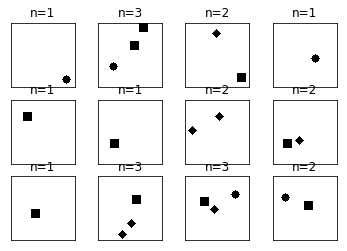

In [5]:
# plot random 12 of the test images
si.plot_12images(images_test, labels_test)

#### Labels formatting.

In [6]:
# convert class vectors to binary class matrices
labels_test = np_utils.to_categorical(labels_test-1, num_classes=None)

In [7]:
print(labels_test)
print('labels_test shape:', labels_test.shape)

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]
labels_test shape: (6000, 3)


#### CNN model.

In [8]:
# imports
from CNNcount import model_count_shapes as mcs

In [9]:
# filename for model saving
diff_shape_same_radius_model_fname = "/home/elena/eStep/XAI/Data/CountingShapes/model_diff_shapes_same_radius.h5"

In [10]:
# load the trained model
from keras.models import load_model
model = load_model(diff_shape_same_radius_model_fname) 
print("Loaded model from disk")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Loaded model from disk


#### Evaluate on test images

In [11]:
score = model.evaluate(images_test, labels_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0007023864083457738
Test accuracy: 1.0


In [14]:
# constants
NMIN, NMAX = 1, 3  # nbr of shapes
RMIN, RMAX = 2, 6  # shape radius

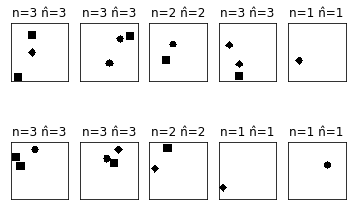

In [16]:
# generate 10 random images and predict the number of shapes using the trained model
num_shapes = len(si.SHAPES)
shape_radius = int((RMIN+RMAX)/2)
for i in range(10):
    n = int(np.random.randint(NMIN, NMAX+1))        
    shapes = [(np.random.randint(num_shapes), shape_radius) for _ in range(n)]
    img = si.generate_image(64, shapes, 0)    
    
    X = img[np.newaxis, :, :, np.newaxis].astype(np.float32)
    plt.subplot(2, 5, i+1)
    plt.imshow(img,cmap='binary')
    plt.xticks([])
    plt.yticks([])
    predictions = model.predict(X);
    #print(predictions)
    pred = np.argmax(predictions) + 1 # we subtracted 1 before
    #print(pred)
    plt.title('n=%d n̂=%d' % (n, pred))

plt.show()